# 多维尺度分析(Multidimensional Scaling, MDS)

## 符号定义

|符号|含义|
|:-:|:-:|
|$\bm{x}$|样本点|
|$N$|总样本数|
|$W$|距离矩阵|
|$\bm{y}$|样本点降维后坐标|
|$Y$|样本点降维后的矩阵形式|
|$\bm{x_{i}}$|第i个样本点向量|
|$\bm{y_{i}}$|第i个样本点降维后的向量|
|$d_{ij}$|第i个样本点与第j个样本点之间的距离|

## 概念
MDS解决的是如下问题：在数据点之间的相似性给定的情况下确定这些数据点在低维空间中的表示，并使得降维后数据点之间的相似度与原相似度尽可能相近。

不同于LE和LLE，LE和LLE是局部的，这两个算法仅考虑局部关系，MDS是全局的，其致力于保证在整个数据集范围内降维后依然能够保持数据点之间的相似度不发生大的变化。

显然MDS包含两个主要步骤：

* 在原空间中对数据的相似性进行度量
* 在低维空间中，寻找一个集合，使得集合中的相似性与原空间中的相似性尽可能相同

对于第一步，最为直观的方式就是使用欧式距离进行度量，但是显然可以使用其他方式进行计算。

对于第二步，这是一个优化问题。

## 推导

主要是推导基于欧式距离的MDS

### 计算距离矩阵
$$
\begin{equation}
    w_{ij} = ||\bm{x_i}-\bm{x_j}||_2^2
\end{equation}
$$

### 低维表示求解

* 内积形式

降维后的距离度量有下式
$$
\begin{equation}
    d_{ij}^2 = ||\bm{y_i}-\bm{y_j}||_2^2 = \bm{y_i}^T\bm{y_i} + \bm{y_j}^T\bm{y_j} - 2 \bm{y_i}^T\bm{y_j}
\end{equation}
$$

显然，若降维后集合$Y=\{\bm{y_1}, \bm{y_2}, \cdots, \bm{y_N}\}$满足距离不变的条件，集合$Y^{\prime}=\{\bm{y_1}+c, \bm{y_2}+c, \cdots, \bm{y_N}+c\}$，$c$为常数，也满足距离不变的条件，即有无穷多的集合满足距离不变条件。

不失一般性，假设降维结果是中心化的：

$$
\begin{equation}
    \sum_{i=1}^N\bm{y_i}=\bm{0}
\end{equation}
$$

因此

* 所有数据点之间的距离的和为：

$$
\begin{equation}
    \begin{split}
    \sum_{i=1}^N\sum_{j=1}^Nd_{ij}^2 
    &= \sum_{i=1}^N\sum_{j=1}^N(\bm{y_i}^T\bm{y_i} + \bm{y_j}^T\bm{y_j} - 2 \bm{y_i}^T\bm{y_j}) \\
    &= N\sum_{i=1}^N\bm{y_i}^T\bm{y_i} + N\sum_{j=1}^N\bm{y_j}^T\bm{y_j} - 2 \sum_{i=1}^N\bm{y_i}^T\sum_{j=1}^N\bm{y_j} \\
    &= 2N\sum_{i=1}^N\bm{y_i}^T\bm{y_i} \\
    &= 2Ntr(Y^TY)
    \end{split}
\end{equation}
$$

* 第$i$行距离的和为

$$
\begin{equation}
    \begin{split}
    \sum_{i=1}^Nd_{ij}^2
    &= \sum_{i=1}^N(\bm{y_i}^T\bm{y_i} + \bm{y_j}^T\bm{y_j} - 2 \bm{y_i}^T\bm{y_j}) \\
    &= \sum_{i=1}^N\bm{y_i}^T\bm{y_i} + N\bm{y_j}^T\bm{y_j} - 0 \\
    &= N(Y^TY)_{jj} + tr(Y^TY)
    \end{split}
\end{equation}
$$

* 第$j$列距离的和为

$$
\begin{equation}
    \begin{split}
    \sum_{j=1}^Nd_{ij}^2
    &= \sum_{j=1}^N(\bm{y_i}^T\bm{y_i} + \bm{y_j}^T\bm{y_j} - 2 \bm{y_i}^T\bm{y_j}) \\
    &= N\bm{y_i}^T\bm{y_i} + \sum_{j=1}^N\bm{y_j}^T\bm{y_j} - 0 \\
    &= N(Y^TY)_{ii} + tr(Y^TY)
    \end{split}
\end{equation}
$$
可得
$$
\begin{equation}
    \begin{split}
    \bm{y_i}^T\bm{y_i} 
    &= (Y^TY)_{ii} \\
    &= \frac{1}{N}(\sum_{j=1}^Nd_{ij}^2 - tr(Y^TY))\\
    &= \frac{1}{N}(\sum_{j=1}^Nd_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^Nd_{ij}^2)
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \bm{y_j}^T\bm{y_j} 
    &= (Y^TY)_{jj} \\
    &= \frac{1}{N}(\sum_{i=1}^Nd_{ij}^2 - tr(Y^TY))\\
    &= \frac{1}{N}(\sum_{i=1}^Nd_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^Nd_{ij}^2 )
    \end{split}
\end{equation}
$$


根据MDS的要求，降维后距离的计算结果与降维前完全一致，因此有

$$
\begin{equation}
    d_{ij} = w_{ij}
\end{equation}
$$

将式-4到式-9带入式-2有
$$
\begin{equation}
    w_{ij}^2 = \frac{1}{N}(\sum_{j=1}^Nw_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^Nw_{ij}^2) + \frac{1}{N}(\sum_{i=1}^Nw_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^Nw_{ij}^2 ) - 2(Y^TY)_{ij}
\end{equation}
$$

可得
$$
\begin{equation}
    (Y^TY)_{ij} = -\frac{1}{2}(w_{ij}^2-\frac{1}{N}\sum_{j=1}^Nw_{ij}^2-\frac{1}{N}\sum_{i=1}^Nw_{ij}^2+\frac{1}{N^2}\sum_{i=1}^N\sum_{j=1}^Nw_{ij}^2)
\end{equation}
$$

上式得到了矩阵$Y^TY$，因此为了求得矩阵$Y$，只需要对$Y^TY$进行特征分解即可，对于降维到$d$维的问题，需要取得特征分解的前k个最大特征值以及这些特征值对应的特征向量。

设$B=Y^TY$，对$B$进行特征分解可得

$$
\begin{equation}
    B = V \Lambda V^T = Y^TY
\end{equation}
$$
从上式能很方便的确定矩阵$Y$，有
$$
\begin{equation}
    Y^T = V_k\Lambda_k^{\frac{1}{2}}
\end{equation}
$$

* 迭代形式

这里采用的梯度下降法实现迭代法。对于MDS，Sklearn中采用的SMACOF，SMACOF无论是求解速度还是求解结果均要优于梯度下降法。

首先定义损失函数
$$
\begin{equation}
    \mathcal{L} = \sum_{ij}(||\bm{y_i}-\bm{y_j}||_2^2-w_{ij})^2
\end{equation}
$$

上式的损失函数十分简单，就是保证降维后任意两点之间的距离与降维前的距离尽可能一致

对上式进行分析

$$
\begin{equation}
    \begin{split}
    \mathcal{L}
    &= \sum_{ij}(||\bm{y_i}-\bm{y_j}||_2^2-w_{ij})^2 \\
    &= \sum_{ij}(\bm{y_i}^T\bm{y_i} + \bm{y_j}^T\bm{y_j} - 2\bm{y_i}^T\bm{y_j} - w_{ij})^2
    \end{split}
\end{equation}
$$

求损失对矩阵$Y$的偏导
$$
\begin{equation}
    \begin{split}
    \frac{\partial{L}}{\partial{Y}} 
    &= \frac{\partial{(\sum_{ij}(\bm{y_i}^T\bm{y_i} + \bm{y_j}^T\bm{y_j} - 2\bm{y_i}^T\bm{y_j} - w_{ij})^2)}}{\partial{[\bm{y_1}, \bm{y_2}, \cdots, \bm{y_n}]}}
    \end{split}
\end{equation}
$$

可得
$$
\begin{equation}
    \begin{split}
    \frac{\partial{L}}{\partial{\bm{y_k}}} 
    &= \frac{\partial{(\sum_{ij}(\bm{y_i}^T\bm{y_i} + \bm{y_j}^T\bm{y_j} - 2\bm{y_i}^T\bm{y_j} - w_{ij})^2)}}{\partial{\bm{y_k}}} \\
    &= \frac{\partial{(\sum_{i=1}^N(\bm{y_i}^T\bm{y_i} + \bm{y_k}^T\bm{y_k} - 2\bm{y_i}^T\bm{y_k} - w_{ik})^2 + \sum_{j=1}^N(\bm{y_k}^T\bm{y_k} + \bm{y_j}^T\bm{y_j} - 2\bm{y_k}^T\bm{y_j} - w_{kj})^2)}}{\partial{\bm{y_k}}} \\
    &= 2(\sum_{i=1}^N(\bm{y_i}^T\bm{y_i} + \bm{y_k}^T\bm{y_k} - 2\bm{y_i}^T\bm{y_k} - w_{ik})(2\bm{y_k}^T-2\bm{y_i}^T)) + 2(\sum_{j=1}^N(\bm{y_k}^T\bm{y_k} + \bm{y_j}^T\bm{y_j} - 2\bm{y_k}^T\bm{y_j} - w_{kj})(2\bm{y_k}^T-2\bm{y_j}^T)) \\
    &= 8\sum_{i=1}^N(\bm{y_i}^T\bm{y_i} + \bm{y_k}^T\bm{y_k} - 2\bm{y_i}^T\bm{y_k} - w_{ik})(\bm{y_k}-\bm{y_i})^T \\
    &= 8\sum_{i=1}^N(||\bm{y_i}-\bm{y_k}||_2^2-w_{ik})(\bm{y_k}-\bm{y_i})^T
    \end{split}, k=1, 2, \cdots, N
\end{equation}
$$

可得降维结果更新规则为
$$
\begin{equation}
    \bm{y_k}(t+1) = \bm{y_k}(t) - \lambda\frac{\partial{L}}{\partial{\bm{y_k}}}
\end{equation}
$$
其中$\lambda$为学习率

上述的梯度计算结果表明，在每一步更新迭代中，均需要计算所有样本点两两之间的距离，这是十分耗费计算资源的操作，因此迭代式的MDS相较于基于特征分解的MDS要慢不少，但是好处是能得到相对更符合实际使用需求的结果，同时迭代法也能够适应不同的距离度量方式。


## 算法流程

* **内积形式**
    1. 按照下式计算距离矩阵$\bm{W}$的各项
    $$
    w_{ij} = ||\bm{x_i}-\bm{x_j}||_2^2
    $$
    2. 按照下式计算$Y^TY$矩阵各项取值
    $$
    (Y^TY)_{ij} = -\frac{1}{2}(w_{ij}^2-\frac{1}{N}\sum_{j=1}^Nw_{ij}^2-\frac{1}{N}\sum_{i=1}^Nw_{ij}^2+\frac{1}{N^2}\sum_{i=1}^N\sum_{j=1}^Nw_{ij}^2)
    $$
    3. 对$Y^TY$进行特征分解得到前k个最大特征值以及其对应的特征向量，计算得到降维后的结果

* **迭代形式（梯度下降法）**
    1. 按照下式计算距离矩阵$\bm{W}$的各项
    $$
    w_{ij} = ||\bm{x_i}-\bm{x_j}||_2^2
    $$
    2. 对于每一个降维结果$\bm{y_k}, k=1, 2, \cdots, N$，求得损失函数对其的偏导
    $$
    \frac{\partial{L}}{\partial{\bm{y_k}}}=8\sum_{i=1}^N(||\bm{y_i}-\bm{y_k}||_2^2-w_{ik})(\bm{y_k}-\bm{y_i})^T
    $$
    3. 更新降维结果$\bm{y_k}, k=1, 2, \cdots, N$
    $$
    \bm{y_k}(t+1) = \bm{y_k}(t) - \lambda\frac{\partial{L}}{\partial{\bm{y_k}}}
    $$
    4. 重复2、3式直到达到迭代停止条件



## 参考资料

https://zhuanlan.zhihu.com/p/51441355

https://www.stat.pitt.edu/sungkyu/course/2221Fall13/lec8_mds_combined.pdf

In [1]:
import numpy as np
from scipy import linalg
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.neighbors import NearestNeighbors

In [2]:
class MyMDS(object):

    def __init__(self, input_data, reduction_dims):

        self.input_data = input_data
        self.reduction_dims = reduction_dims

        self.samples_num, self.input_dims = self.input_data.shape

        # distance mat
        self.distance_mat = np.zeros((self.samples_num, self.samples_num))

        # reduction result
        self.output_mat = np.zeros((self.samples_num, reduction_dims))
    
    def __call__(self, mds_type="inner", distance_type="l2", iter_num=1000, min_loss=1e-3, lr=1e-3):
        """
        mds_type: default type is "inner", which can also choose type of "iter" 
        distance_type: default type is "l2"
        """
        self._cal_distance_mat(distance_type)
        if mds_type == "inner":
            inner_product = self._cal_inner_product()
            topk_vals, topk_vecs = self._cal_topk_eigh(inner_product, self.reduction_dims)
            self.output_mat = np.matmul(topk_vecs, np.diag(np.power(topk_vals, 0.5).reshape(-1)))
        elif mds_type == "iter":
            self._iter_main(iter_num, min_loss, lr)
        else:
            raise ValueError
        
        return self.output_mat
        
    def _cal_distance_mat(self, distance_type="l2"):
        if distance_type == "l2":
            self.distance_mat = squareform(pdist(self.input_data, metric="euclidean"))
        else:
            raise ValueError
        pass

    def _cal_inner_product(self):
        distance_mat_squre = np.power(self.distance_mat, 2)

        # row sum
        distance_mat_row_sum = np.repeat(np.sum(distance_mat_squre, axis=0).reshape(-1, 1), self.samples_num, axis=1)

        # cul sum
        distance_mat_cul_sum = np.repeat(np.sum(distance_mat_squre, axis=1).reshape(1, -1), self.samples_num, axis=0)
        
        # total sum
        distance_mat_total_sum = np.ones((self.samples_num, self.samples_num)) * np.sum(distance_mat_squre)

        # cal inner product
        inner_product = -(distance_mat_squre - (distance_mat_row_sum + distance_mat_cul_sum)/self.samples_num + distance_mat_total_sum/pow(self.samples_num, 2))/2

        return inner_product

    def _cal_topk_eigh(self, mat, k):
        e_vals, e_vecs = np.linalg.eig(mat)
        sorted_ind = np.argsort(e_vals)

        topk_e_vals = e_vals[sorted_ind[:-1-k:-1]]
        topk_e_vecs = e_vecs[:, sorted_ind[:-1-k:-1]]
        return topk_e_vals, topk_e_vecs

    def _iter_main(self, iter_num=100, min_loss=1e-3, lr=1e-3, seed=1024):

        np.random.seed = seed
        self.output_mat = np.random.random((self.samples_num, self.reduction_dims))

        iter_done = False

        reduction_distance_mat = squareform(pdist(self.output_mat, metric="euclidean"))
        mds_loss = np.mean(np.power(reduction_distance_mat - self.distance_mat, 2))
        iter_loop = 0

        while not iter_done:

            reduction_distance_mat = squareform(pdist(self.output_mat, metric="euclidean"))
            temp_reduction_mat = self.output_mat.copy()

            # update loop
            for i in range(self.samples_num):
                self.output_mat[i, :] -= lr * np.matmul((reduction_distance_mat[i, :] - self.distance_mat[i, :]).reshape(1, -1), np.tile(temp_reduction_mat[i, :].reshape(1, -1), (self.samples_num, 1)) - temp_reduction_mat).reshape(-1)
            
            reduction_distance_mat = squareform(pdist(self.output_mat, metric="euclidean"))
            mds_loss = np.mean(np.power(reduction_distance_mat - self.distance_mat, 2))
            if iter_loop == iter_num or mds_loss <= min_loss:
                iter_done = True
            elif iter_loop % 100 == 0:
                print("steps:{} \t loss: {:.4f}".format(iter_loop, mds_loss))
            iter_loop += 1

    def _cal_partial_derivative(self):
        pass

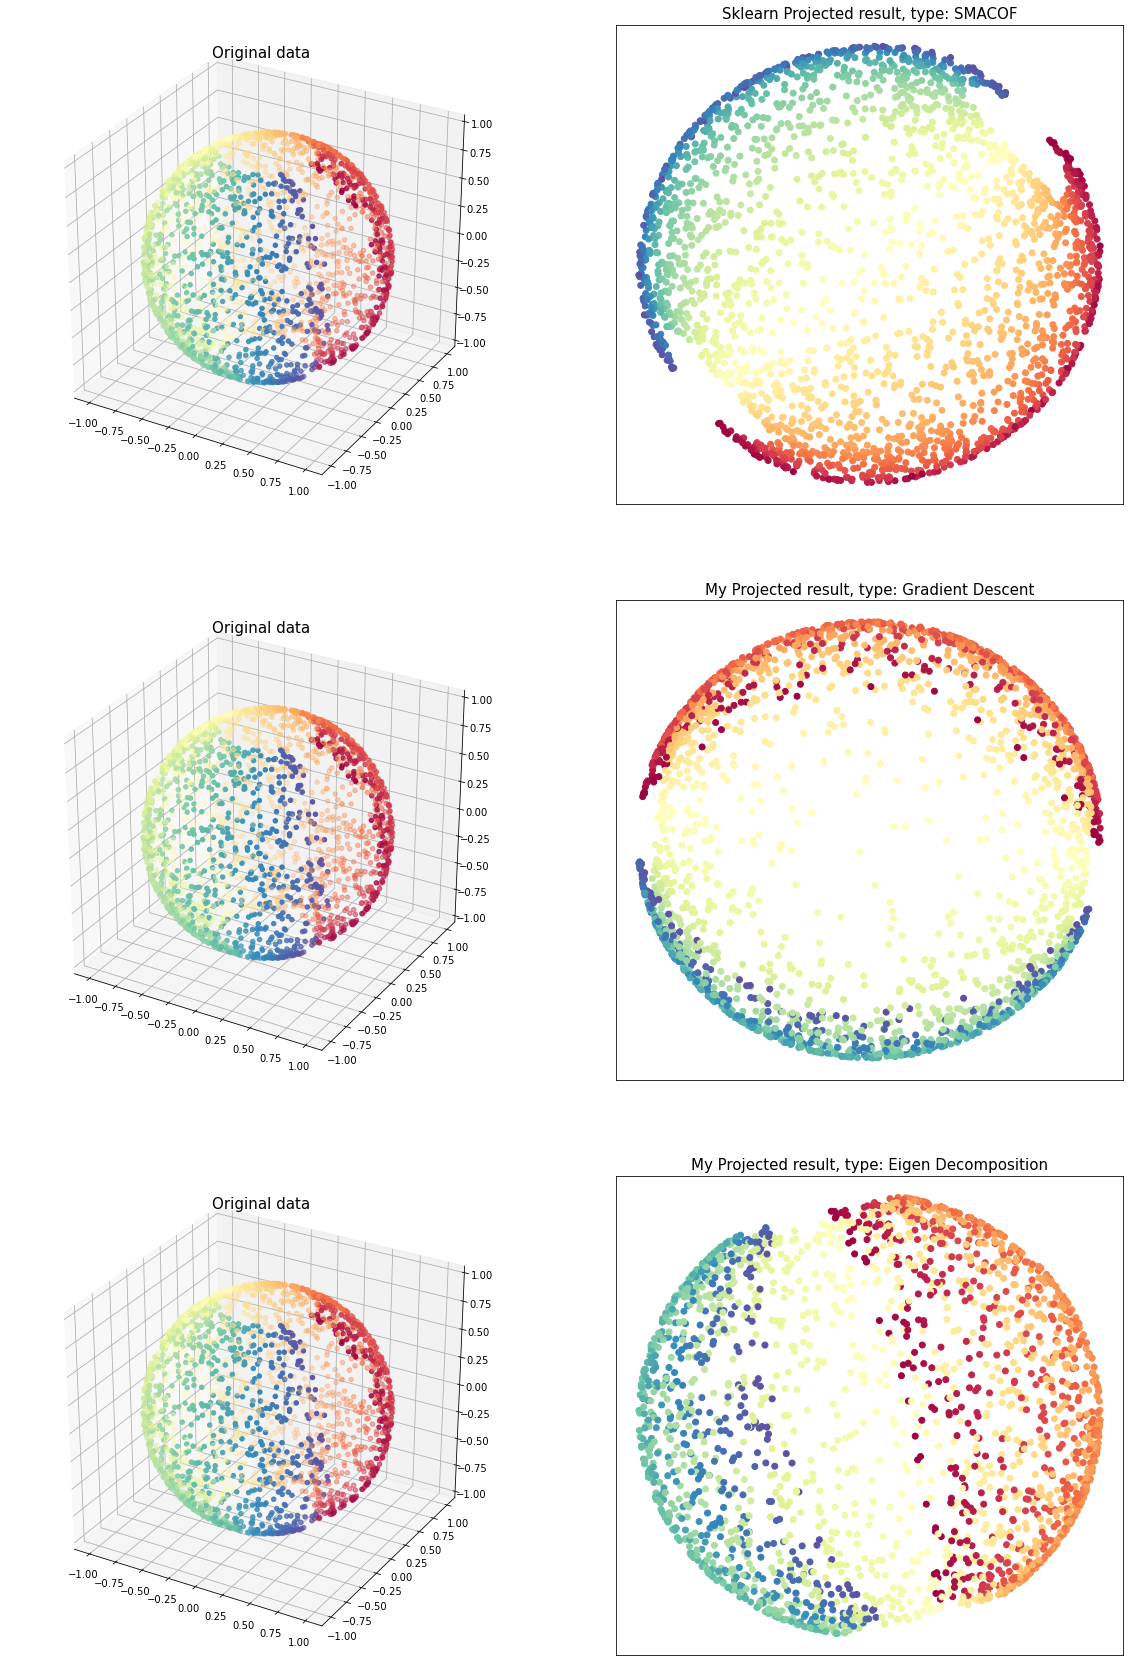

In [4]:
# ---------------------- create data ----------------------
n_samples = 3000

# Create our sphere.
np.random.seed = 1024
p = np.random.rand(n_samples) * (2 * np.pi - 0.55)
t = np.random.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
samples_color = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)
raw_samples = np.array([x, y, z]).T

#  ---------------------- sklearn MDS ---------------------- 
sklearn_mds = manifold.MDS(n_components=2, max_iter=200, n_init=1)
sklearn_mds_result = sklearn_mds.fit_transform(raw_samples)

# ----------------------- My MDS ---------------------------
my_mds = MyMDS(input_data=raw_samples, reduction_dims=2)

## inner type
my_mds_result_inner_type = my_mds()

## iter type
my_mds_result_iter_type = my_mds(mds_type="iter", iter_num=800, lr=6e-5)

# ----------------------
# draw func
fig = plt.figure(figsize=(20, 30))

ax = fig.add_subplot(321, projection="3d")
ax.set_title("Original data", fontsize=15)
ax.scatter(raw_samples[:, 0], raw_samples[:, 1], raw_samples[:, 2], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(322)
plt.xticks([])
plt.yticks([])
plt.title("Sklearn Projected result, type: SMACOF", fontsize=15)
ax.scatter(sklearn_mds_result[:, 0], sklearn_mds_result[:, 1], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(323, projection="3d")
ax.set_title("Original data", fontsize=15)
ax.scatter(raw_samples[:, 0], raw_samples[:, 1], raw_samples[:, 2], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(324)
plt.xticks([])
plt.yticks([])
plt.title("My Projected result, type: Gradient Descent", fontsize=15)
ax.scatter(my_mds_result_iter_type[:, 0], my_mds_result_iter_type[:, 1], c=samples_color, cmap=plt.cm.Spectral)


ax = fig.add_subplot(325, projection="3d")
ax.set_title("Original data", fontsize=15)
ax.scatter(raw_samples[:, 0], raw_samples[:, 1], raw_samples[:, 2], c=samples_color, cmap=plt.cm.Spectral)

ax = fig.add_subplot(326)
plt.xticks([])
plt.yticks([])
plt.title("My Projected result, type: Eigen Decomposition", fontsize=15)
ax.scatter(my_mds_result_inner_type[:, 0], my_mds_result_inner_type[:, 1], c=samples_color, cmap=plt.cm.Spectral)

plt.show()